In [169]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [170]:
CUSTOM_MODEL_NAME = "my_ssd_mobnet"
PRETRAINED_MODEL_NAME = "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8"
PRETRAINED_MODEL_URL = "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"
LABEL_MAP_NAME = "label_map.pbtxt"

In [171]:
import os

In [172]:
paths = {
    "WORKSPACE_PATH": os.path.join(
        "/users", "sepi", "Desktop", "Coding", "Data", "Tensorflow", "workspace"
    ),
    "SCRIPTS_PATH": os.path.join(
        "/users", "sepi", "Desktop", "Coding", "Data", "Tensorflow", "scripts"
    ),
    "APIMODEL_PATH": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "models",
    ),
    "ANNOTATION_PATH": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "workspace",
        "annotations",
    ),
    "IMAGE_PATH": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "workspace",
        "images",
    ),
    "MODEL_PATH": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "workspace",
        "models",
    ),
    "PRETRAINED_MODEL_PATH": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "workspace",
        "pre-trained-models",
    ),
    "CHECKPOINT_PATH": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "workspace",
        "models",
        CUSTOM_MODEL_NAME,
    ),
    "OUTPUT_PATH": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "workspace",
        "models",
        CUSTOM_MODEL_NAME,
        "export",
    ),
    "TFJS_PATH": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "workspace",
        "models",
        CUSTOM_MODEL_NAME,
        "tfjsexport",
    ),
    "TFLITE_PATH": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "workspace",
        "models",
        CUSTOM_MODEL_NAME,
        "tfliteexport",
    ),
    "PROTOC_PATH": os.path.join(
        "/users", "sepi", "Desktop", "Coding", "Data", "Tensorflow", "protoc"
    ),
}

In [173]:
files = {
    "PIPELINE_CONFIG": os.path.join(
        "/users",
        "sepi",
        "Desktop",
        "Coding",
        "Data",
        "Tensorflow",
        "workspace",
        "models",
        CUSTOM_MODEL_NAME,
        "pipeline.config",
    ),
    "LABELMAP": os.path.join(paths["ANNOTATION_PATH"], LABEL_MAP_NAME),
}

In [174]:
for path in paths.values():
    print(path)
    if not os.path.exists(path):
        if os.name == "posix":
            !mkdir -p {path}

/users/sepi/Desktop/Coding/Data/Tensorflow/workspace
/users/sepi/Desktop/Coding/Data/Tensorflow/scripts
/users/sepi/Desktop/Coding/Data/Tensorflow/models
/users/sepi/Desktop/Coding/Data/Tensorflow/workspace/annotations
/users/sepi/Desktop/Coding/Data/Tensorflow/workspace/images
/users/sepi/Desktop/Coding/Data/Tensorflow/workspace/models
/users/sepi/Desktop/Coding/Data/Tensorflow/workspace/pre-trained-models
/users/sepi/Desktop/Coding/Data/Tensorflow/workspace/models/my_ssd_mobnet
/users/sepi/Desktop/Coding/Data/Tensorflow/workspace/models/my_ssd_mobnet/export
/users/sepi/Desktop/Coding/Data/Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport
/users/sepi/Desktop/Coding/Data/Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport
/users/sepi/Desktop/Coding/Data/Tensorflow/protoc


In [175]:
# import dependencies
import tensorflow as tf  #
from tensorflow import keras
from keras import layers

In [176]:
# set the path
import os

IMAGES_PATH = os.path.join("/users", "sepi", "Desktop", "Coding", "Data", "esimerkit")

In [177]:
# The path to the dataset
directory = IMAGES_PATH

In [178]:
# Training data
from functools import partial

load_split = partial(
    tf.keras.utils.image_dataset_from_directory,
    directory,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=60,
    image_size=(829, 796),
    shuffle=True,
    seed=13,
    validation_split=0.2,
)

ds_train = load_split(subset="training")
ds_valid = load_split(subset="validation")

Found 240 files belonging to 4 classes.
Using 192 files for training.
Found 240 files belonging to 4 classes.
Using 48 files for validation.


In [179]:
class_names = ds_train.class_names

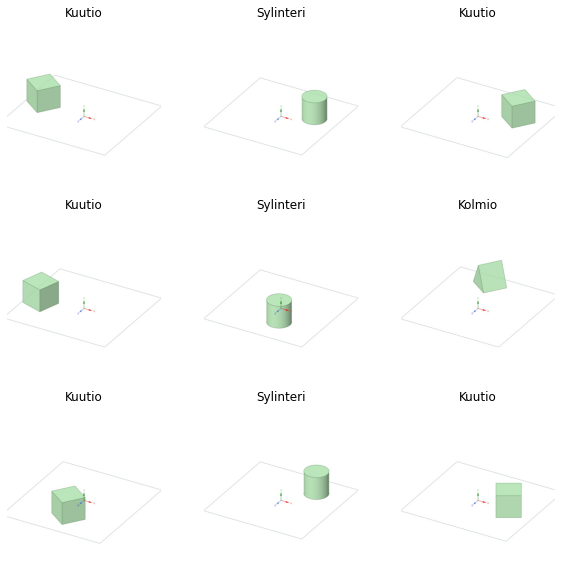

In [180]:
# Plot training pictures
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [181]:
if not os.path.exists(
    os.path.join(paths["APIMODEL_PATH"], "research", "object_detection")
):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [182]:
with open(files["LABELMAP"], "w") as f:
    for id, labelName in enumerate(class_names):
        print(id + 1, labelName)
        f.write("item { \n")
        f.write("\tname:'{}'\n".format(labelName))
        f.write("\tid:{}\n".format(id + 1))
        f.write("}\n")

1 Kolmio
2 Kuutio
3 Pallo
4 Sylinteri


In [183]:
import object_detection

In [184]:
if os.name == "posix":
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [185]:
#!brew install wget

print(PRETRAINED_MODEL_URL)

if os.name == "posix":
    #!wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
mv: ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz: No such file or directory
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [186]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

TRAINING_FILENAMES, TEST_FILENAMES = train_test_split(
    tf.io.gfile.glob(
        r"/Users/sepi/Desktop/Coding/Data/esimerkit2/esimerkki-TFRecords-export/*.tfrecord"
    ),
    test_size=0.2,
    random_state=101,
)

In [187]:
# Combine tfrecords
import glob
import tensorflow as tf


trainDB = tf.data.TFRecordDataset(
    TRAINING_FILENAMES,
    compression_type=None,  # or 'GZIP', 'ZLIB' if compress you data.
    buffer_size=0,  # any buffer size you want or 0 means no buffering
    num_parallel_reads=os.cpu_count(),  # or 0 means sequentially reading
)

testDB = tf.data.TFRecordDataset(
    TEST_FILENAMES,
    compression_type=None,  # or 'GZIP', 'ZLIB' if compress you data.
    buffer_size=0,  # any buffer size you want or 0 means no buffering
    num_parallel_reads=os.cpu_count(),  # or 0 means sequentially reading
)


writer = tf.data.experimental.TFRecordWriter(
    os.path.join(paths["ANNOTATION_PATH"], "train.record")
)
writer.write(trainDB)

writer = tf.data.experimental.TFRecordWriter(
    os.path.join(paths["ANNOTATION_PATH"], "test.record")
)
writer.write(testDB)

In [188]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [189]:
config = config_util.get_configs_from_pipeline_file(files["PIPELINE_CONFIG"])

In [190]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files["PIPELINE_CONFIG"], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [191]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(
    paths["PRETRAINED_MODEL_PATH"], PRETRAINED_MODEL_NAME, "checkpoint", "ckpt-0"
)
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path = files["LABELMAP"]
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [
    os.path.join(paths["ANNOTATION_PATH"], "train.record")
]
pipeline_config.eval_input_reader[0].label_map_path = files["LABELMAP"]
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [
    os.path.join(paths["ANNOTATION_PATH"], "test.record")
]

In [192]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files["PIPELINE_CONFIG"], "wb") as f:
    f.write(config_text)

In [193]:
TRAINING_SCRIPT = os.path.join(
    paths["APIMODEL_PATH"], "research", "object_detection", "model_main_tf2.py"
)

In [194]:
command = "python3 {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(
    TRAINING_SCRIPT, paths["CHECKPOINT_PATH"], files["PIPELINE_CONFIG"]
)

In [195]:
!{command}

/Users/sepi/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/sepi/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/Users/sepi/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/Users/sepi/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/Users/sepi/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ["dlopen(/Us

In [ ]:
command = (
    "python3 {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(
        TRAINING_SCRIPT,
        paths["CHECKPOINT_PATH"],
        files["PIPELINE_CONFIG"],
        paths["CHECKPOINT_PATH"],
    )
)

In [ ]:
#!{command}

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files["PIPELINE_CONFIG"])
detection_model = model_builder.build(model_config=configs["model"], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths["CHECKPOINT_PATH"], "ckpt-4")).expect_partial()


@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [ ]:
PATH_TO_LABELS = files["LABELMAP"]

category_index = label_map_util.create_category_index_from_labelmap(
    PATH_TO_LABELS, use_display_name=True
)

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [40, 20]

warnings.filterwarnings("ignore")  # Suppress Matplotlib warnings


def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


IMAGE_PATHS = [
    "/Users/sepi/Desktop/Coding/test/Kaikki.jpg",
    "/Users/sepi/Desktop/Coding/test/tyhja.jpg",
    "/Users/sepi/Desktop/Coding/test/ilman_sylinteria.jpg",
    "/Users/sepi/Desktop/Coding/test/ilman_palloa.jpg",
    "/Users/sepi/Desktop/Coding/test/ilman_kuutiota.jpg",
    "/Users/sepi/Desktop/Coding/test/Ilman_kolmiota.jpg",
]

for image_path in IMAGE_PATHS:

    print("Running inference for {}... ".format(image_path), end="")

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop("num_detections"))
    detections = {
        key: value[0, :num_detections].numpy() for key, value in detections.items()
    }
    detections["num_detections"] = num_detections

    # detection_classes should be ints.
    detections["detection_classes"] = detections["detection_classes"].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections["detection_boxes"],
        detections["detection_classes"] + label_id_offset,
        detections["detection_scores"],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=20,
        min_score_thresh=0.5,
        agnostic_mode=False,
    )

    plt.figure()
    plt.imshow(image_np_with_detections)
    print("Done")
plt.show()